In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
with open('/Users/kgb/YDrive/Code/pde_nn/src/datasets/cases/UNet5-rf200/eval_random_8/output.npy', 'rb') as f:
    pred = np.load(f)

In [15]:
with open('/Users/kgb/YDrive/Code/pde_nn/src/datasets/cases/UNet5-rf200/eval_random_8/target.npy', 'rb') as f:
    true = np.load(f)

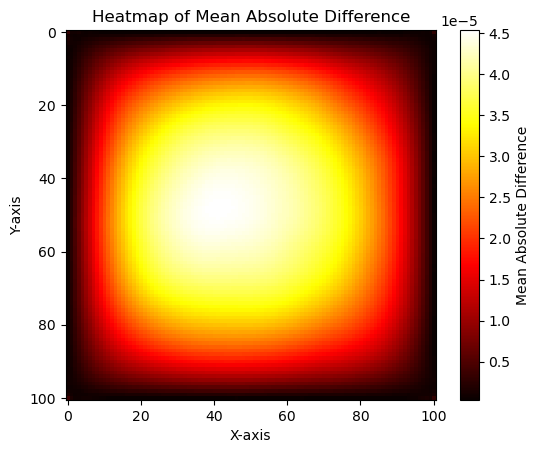

In [16]:
abs_diff = np.abs(pred - true)   # Calculate absolute difference
mean_abs_diff = np.mean(abs_diff, axis=0)  # Mean across the first axis (200 samples)

# Since mean_abs_diff is still of shape (1, 101, 101), we can remove the singleton dimension
heatmap_data = mean_abs_diff.squeeze()  # Resulting shape (101, 101)

# Plotting the heatmap
plt.imshow(heatmap_data, cmap='hot', interpolation='nearest')
plt.colorbar(label='Mean Absolute Difference')
plt.title('Heatmap of Mean Absolute Difference')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

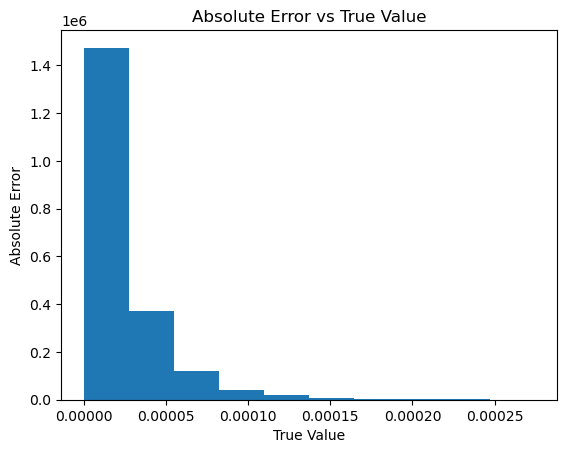

In [22]:
abs_diff_flat = np.abs(pred - true).flatten()   # Calculate absolute difference
true_flat = true.flatten()

fig, ax = plt.subplots()
ax.hist(abs_diff_flat)
plt.title('Absolute Error vs True Value')
plt.xlabel('True Value')
plt.ylabel('Absolute Error')
plt.show()

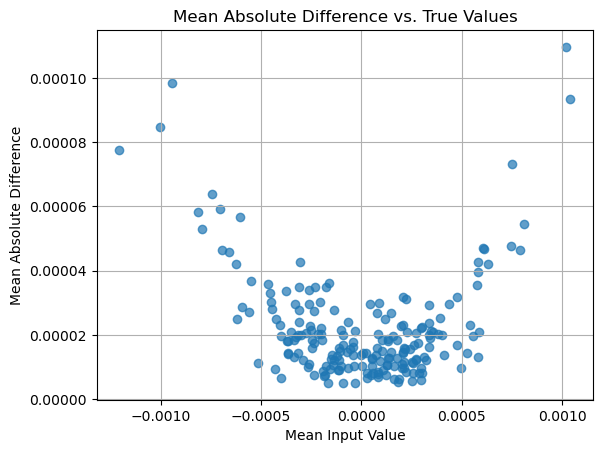

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the absolute differences across all pixels
abs_diff = np.abs(pred - true) 

# Compute the mean absolute difference for each sample across all pixels
mean_abs_diff = np.mean(abs_diff, axis=(1, 2, 3)) 

# Select a representative input feature to compare against (e.g., mean value across all pixels for each sample)
input_values = np.mean(true, axis=(1, 2, 3))

# Plot mean absolute difference vs. input values
plt.scatter(input_values, mean_abs_diff, alpha=0.7)
plt.xlabel('Mean Input Value')
plt.ylabel('Mean Absolute Difference')
plt.title('Mean Absolute Difference vs. True Values')
plt.grid(True)
plt.show()